## *Student Performance Indicator*

##### Life cycle of Machine learning Project :
1.Understanding the Problem Statement

2.Data Collection

3.Data Checks to perform

4.Exploratory data analysis

5.Data Pre-Processing

6.Model Training

7.Choose best model

### 1) Problem statement :
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection : 
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

> 2.1 Import Data and Required Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stud.csv')

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 3) Data Checks to perform :

In [9]:
df.shape

(1000, 8)

In [12]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no NULL value in the given dataset..

In [13]:
df.duplicated().sum()

0

There are no DUPLICATE value in the given dataset..

In [ ]:
df.info()    # to check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.nunique()   # Number of unique values in each column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [16]:
df.describe()   # Summary statistics for numerical columns

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight :-

From above description of numerical data, all means are very close to each other - between 66 and 68.05;

All standard deviations are also close - between 14.6 and 15.19;

While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [ ]:
df.head()  

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploring the data

In [19]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [20]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']  # not = to 'object
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


> Adding columns for "Total Score" and "Average"

In [4]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading_score'] == 100]['average'].count()   # .count() - non NULL values dega
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [23]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


Insights :-

From above values we get students have performed the worst in Maths.

Best performance is in reading section.

### 4) Exploratory data analysis ( Visualization ) :

> kde - kernel distribution function

> histogram - ek bar chart jaisa graph hota hai jo numerical data ki frequency distribution dikhata hai.

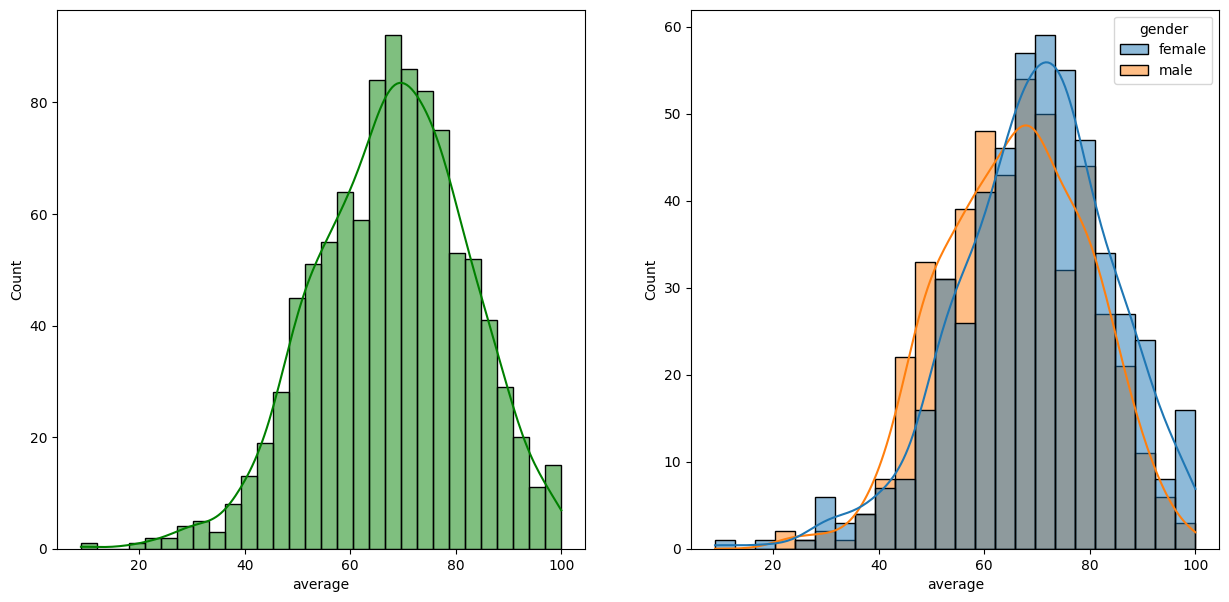

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))  # Ye line 2 plots side-by-side banane ke liye layout taiyar karti hai
plt.subplot(121) # 121 ka matlab: 1r, 2c, 1st plot
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')  # kde=True ek smooth density line bhi add ho jaati hai
  # bin - division
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')  # hue - group by col
plt.show()

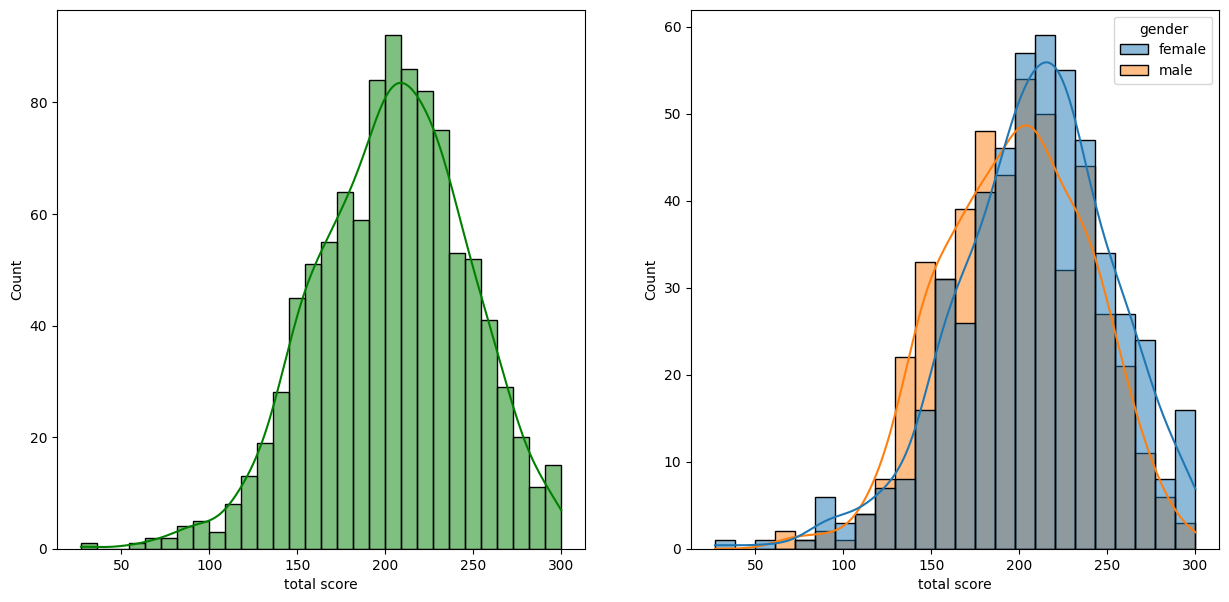

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Insights :-

Female students tend to perform well then male students.

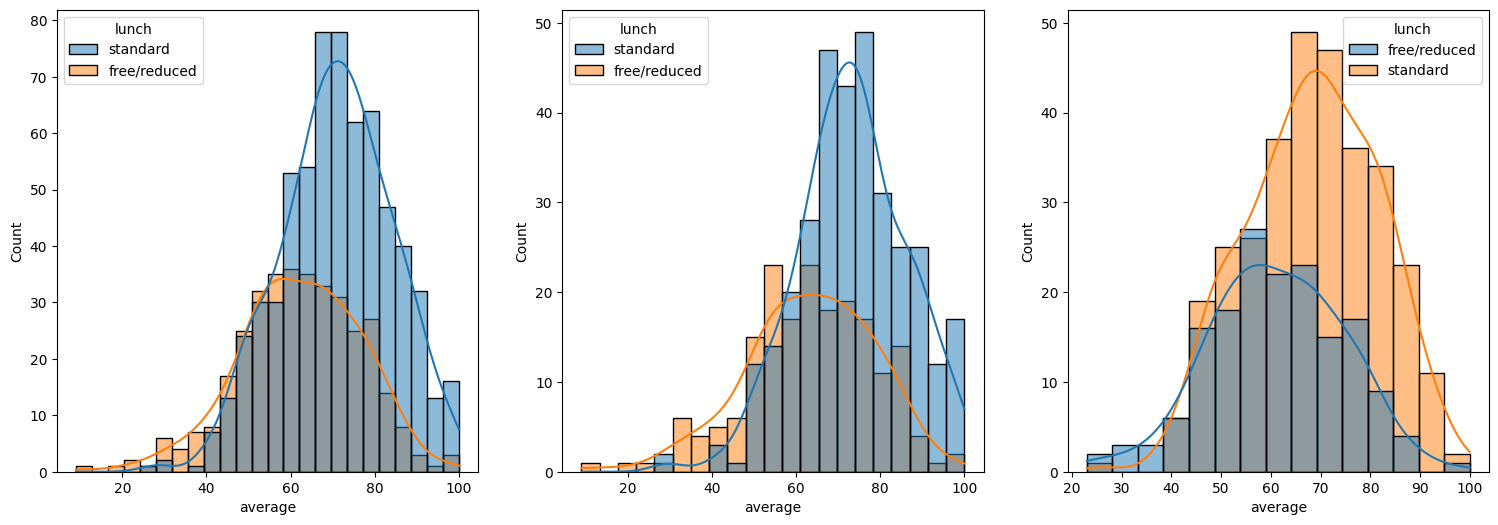

In [8]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch') # Overall average vs lunch type
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch') # Females: average vs lunch type
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch') # Males: average vs lunch type
plt.show()

Insights :-

Standard lunch helps perform well in exams.

Standard lunch helps perform well in exams be it a male or a female.

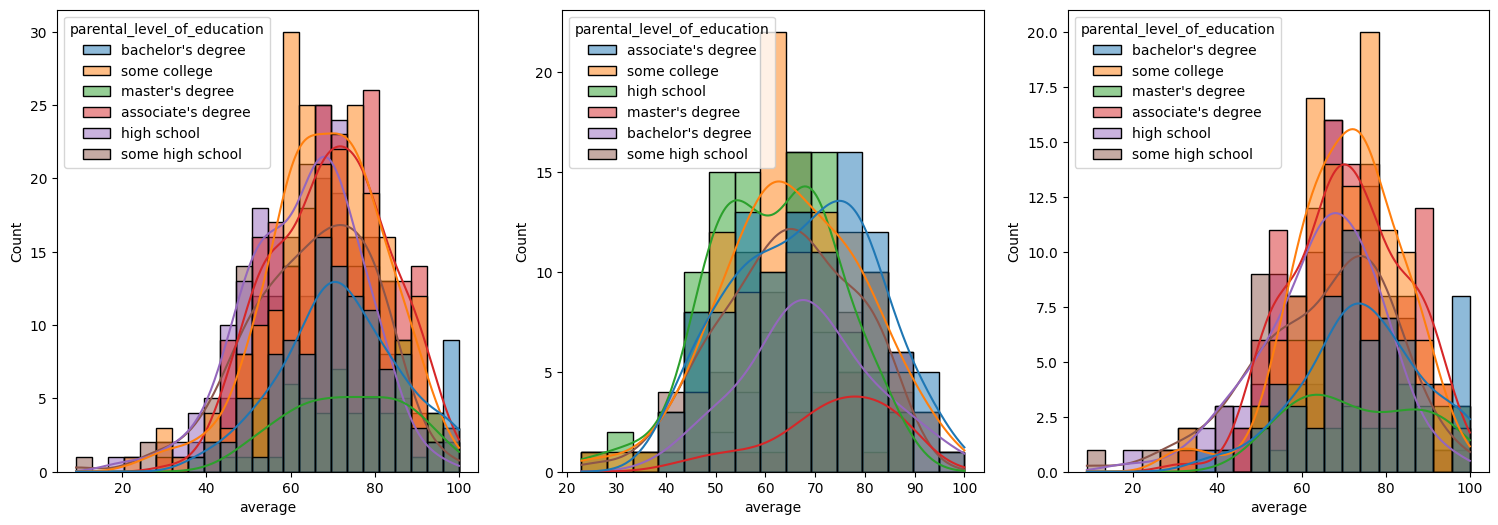

In [9]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education') 
 # Overall average vs parental education level
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
 # Males: Average vs Parents’ Education
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
 # Females: Average vs Parents’ Education
plt.show()

Insights :-

In general parent's education don't help student perform well in exam.

2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.

3rd plot we can see there is no effect of parent's education on female students.

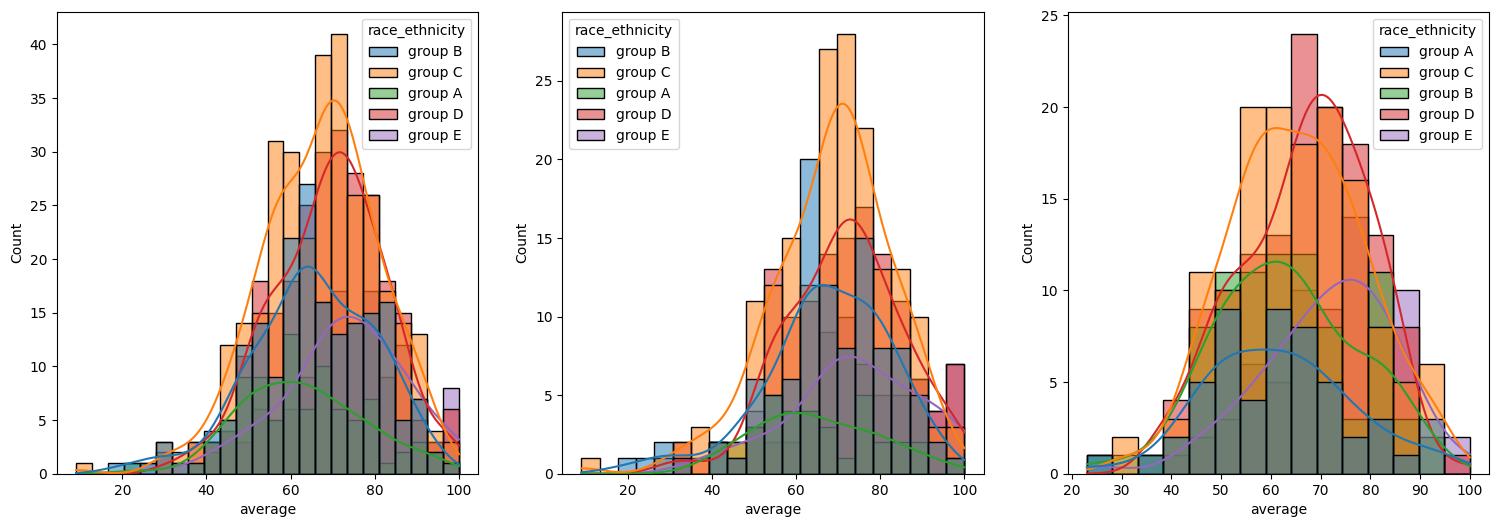

In [10]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Insights :-

Students of group A and group B tends to perform poorly in exam.

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

In [31]:
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


> Maximumum score of students in all three subjects

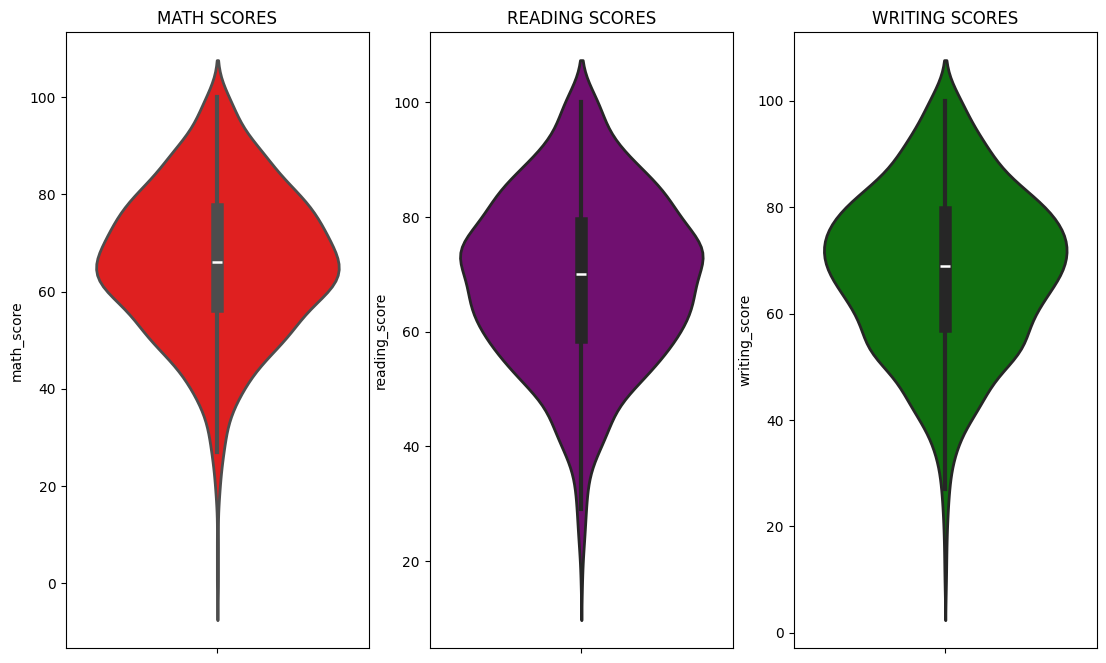

In [20]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=2)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='purple',linewidth=2)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='green',linewidth=2)
plt.show()

Insights :-

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80.

> Multivariate analysis using pieplot

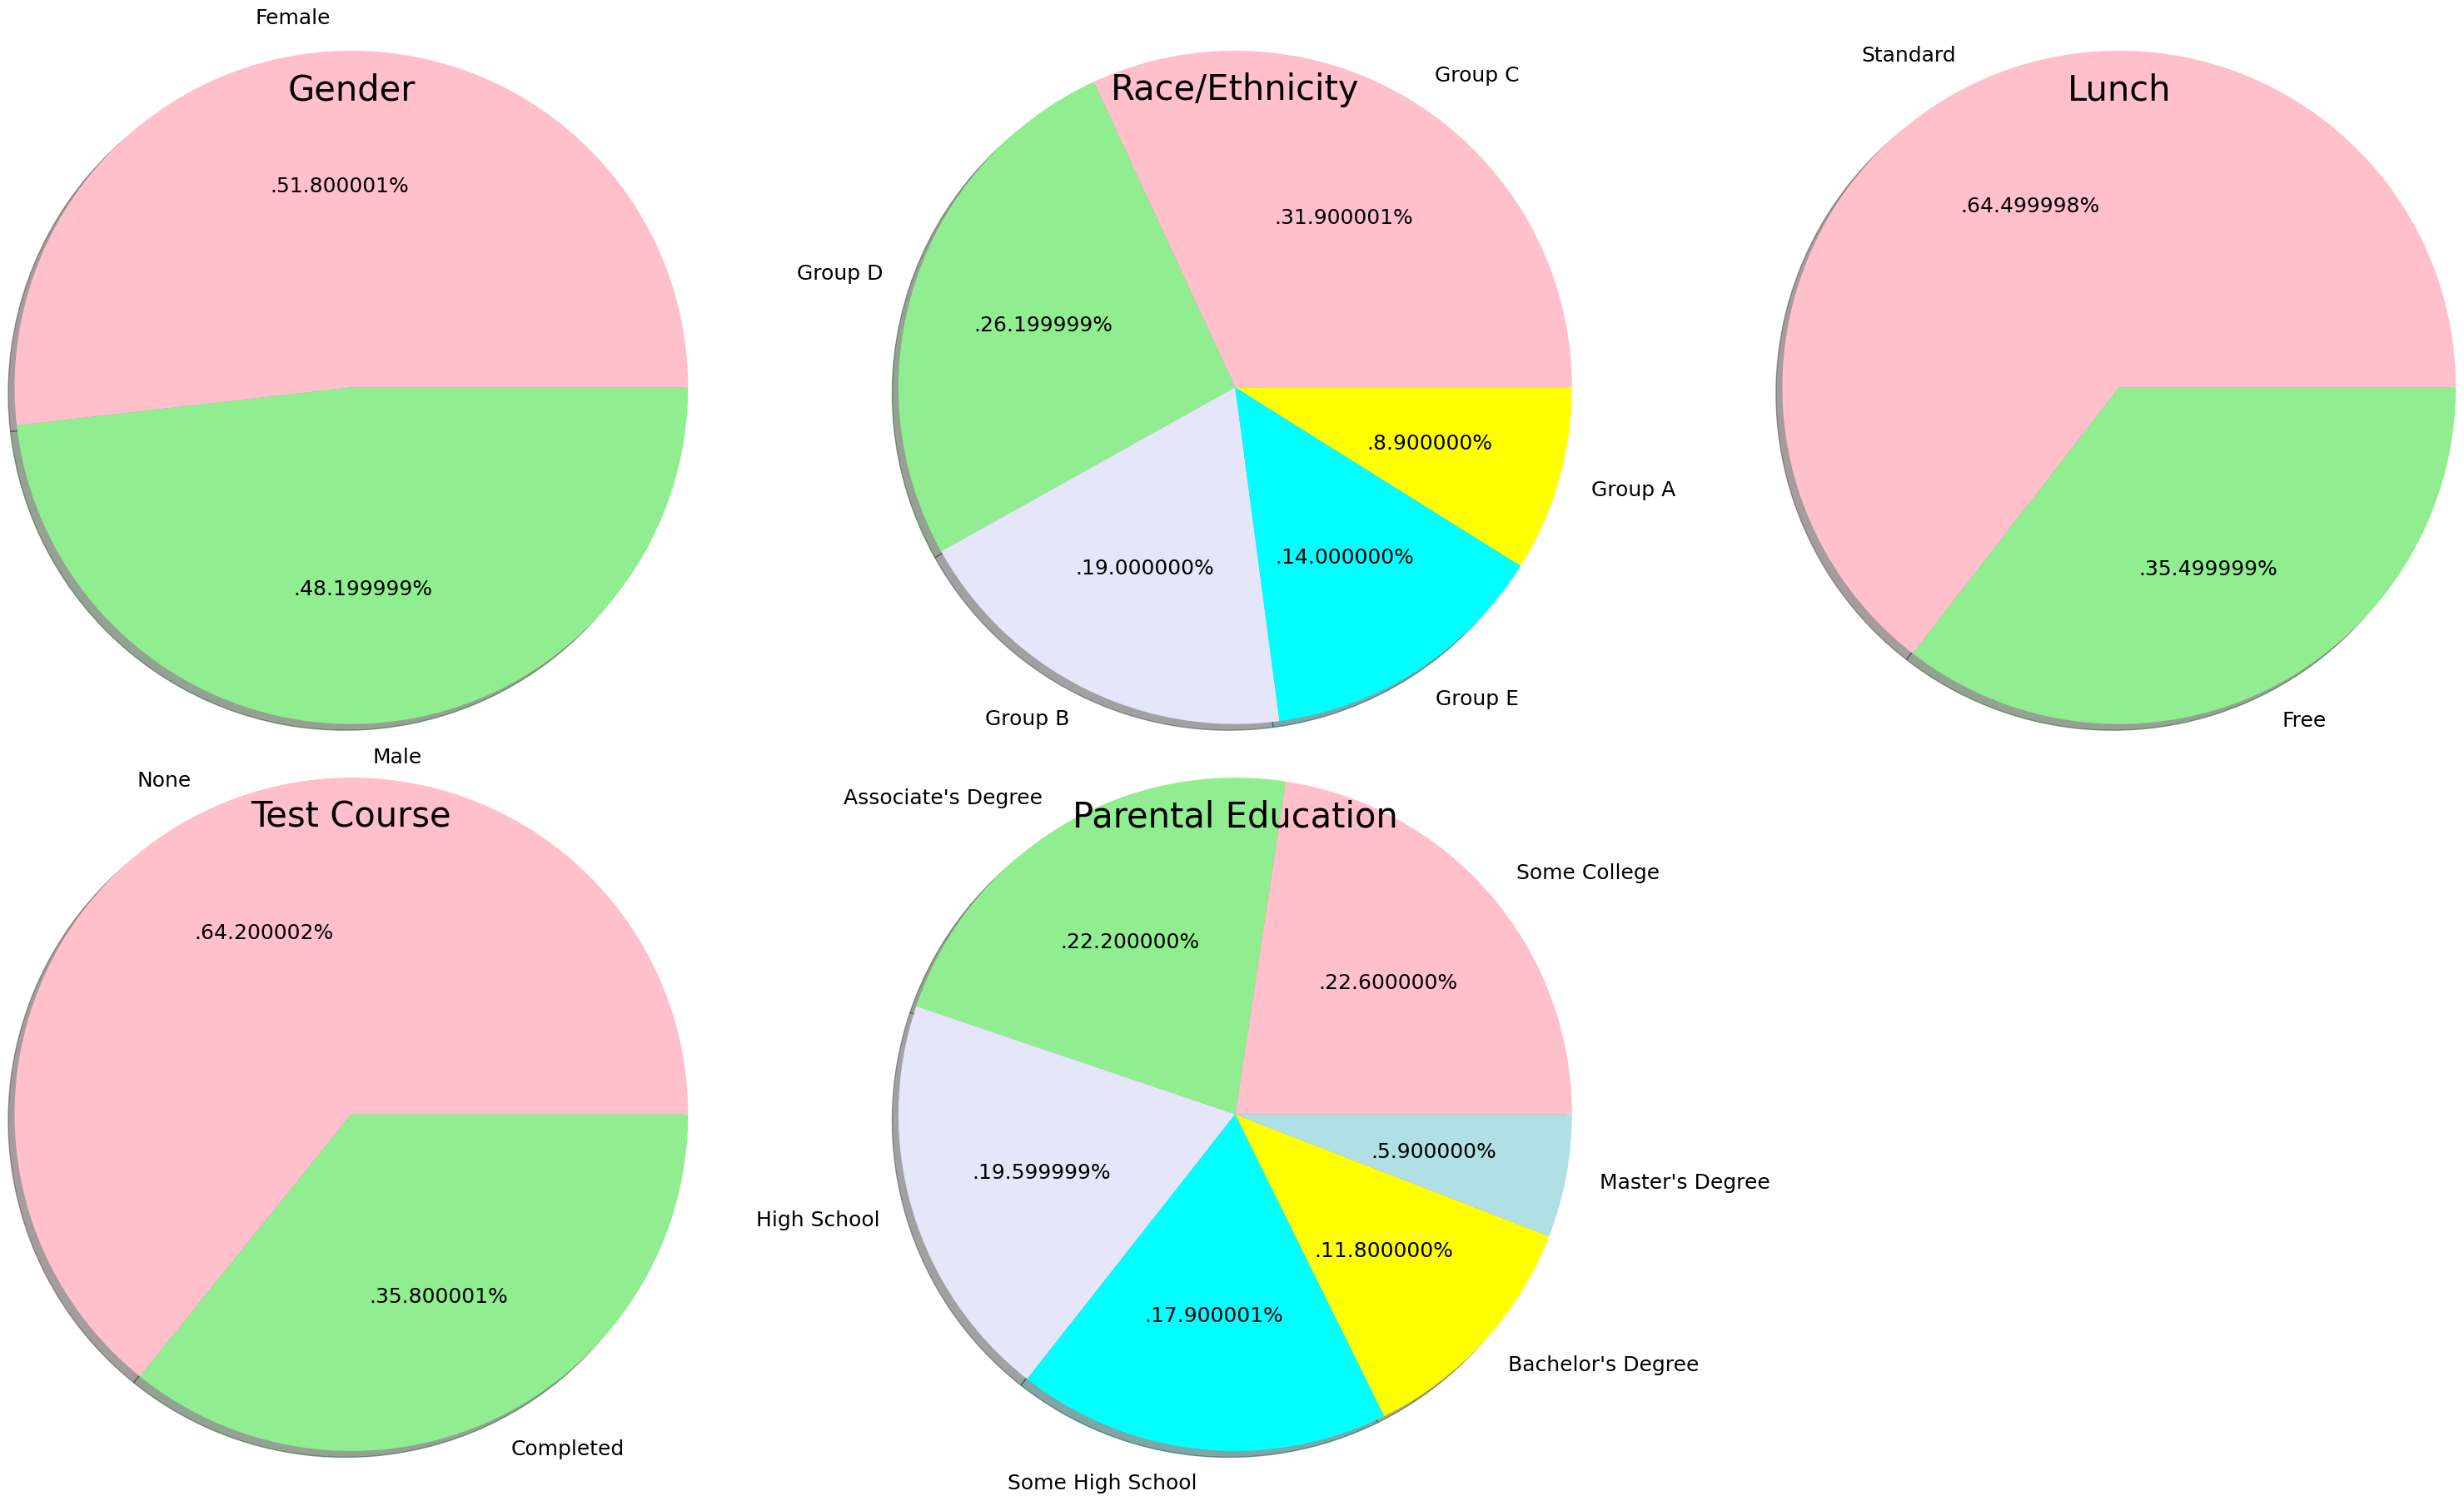

In [72]:
plt.rcParams['figure.figsize'] = (30, 18)

plt.subplot(2, 3, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['pink','lightgreen']

# autopct='.%2f%%' → har slice ke andar percentage print hoga
plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%', radius=1.5, textprops={'fontsize': 18}, shadow=True)
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(2, 3, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['pink', 'lightgreen', 'lavender', 'cyan','yellow']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', radius=1.5, textprops={'fontsize': 18}, shadow=True)
plt.title('Race/Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(2, 3, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['pink','lightgreen']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', radius=1.5, textprops={'fontsize': 18}, shadow=True)
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(2, 3, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['pink','lightgreen']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', radius=1.5, textprops={'fontsize': 18}, shadow=True)
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(2, 3, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['pink', 'lightgreen', 'lavender', 'cyan','yellow','powderblue']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%', radius=1.5, textprops={'fontsize': 18}, shadow=True)
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.show()

Insights :-

Number of Male and Female students is almost equal.

Number students are greatest in Group C.

Number of students who have standard lunch are greater.

Number of students who have not enrolled in any test preparation course is greater.

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree".

> Feature Wise Visualization -

1. GENDER COLUMN

1.1. UNIVARIATE ANALYSIS ( How is distribution of Gender ? )  ->

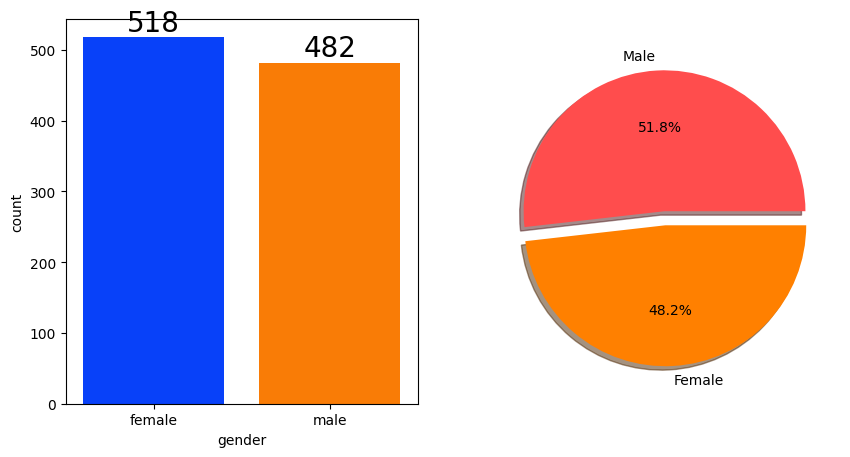

In [66]:
f,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',
        shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Insights :-

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%).

1.2. BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) ->

In [56]:
# Select only numeric columns for groupby mean
numeric_cols = df.select_dtypes(include=[np.number]).columns 
 # .columns → un columns ke naam chahiye.
 # numeric_cols var me ek list aayegi jisme sirf no. wale col ke naam honge

# gender ke basis pe group bana raha hai (male, female)
gender_group = df.groupby('gender')[numeric_cols].mean()
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


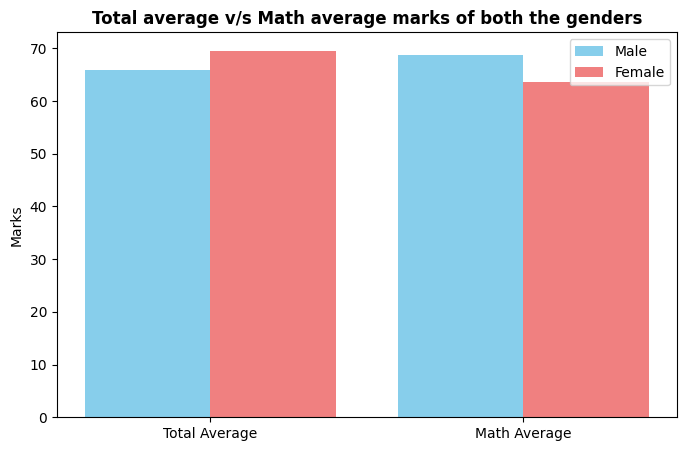

In [61]:
plt.figure(figsize=(8, 5))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female', color='lightcoral')
# Ek thoda left (- 0.2) → Male
# Ek thoda right (+ 0.2) → Female
# Width of bar = 0.4
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend() # legend() → Bar colors ke naam dikhata hai (Male, Female)
plt.show()

Insights :-

On an average females have a better overall score than men.

whereas males have scored higher in Maths.

> 2. RACE/EHNICITY COLUMN

2.1 UNIVARIATE ANALYSIS ( How is Group wise distribution ?) ->

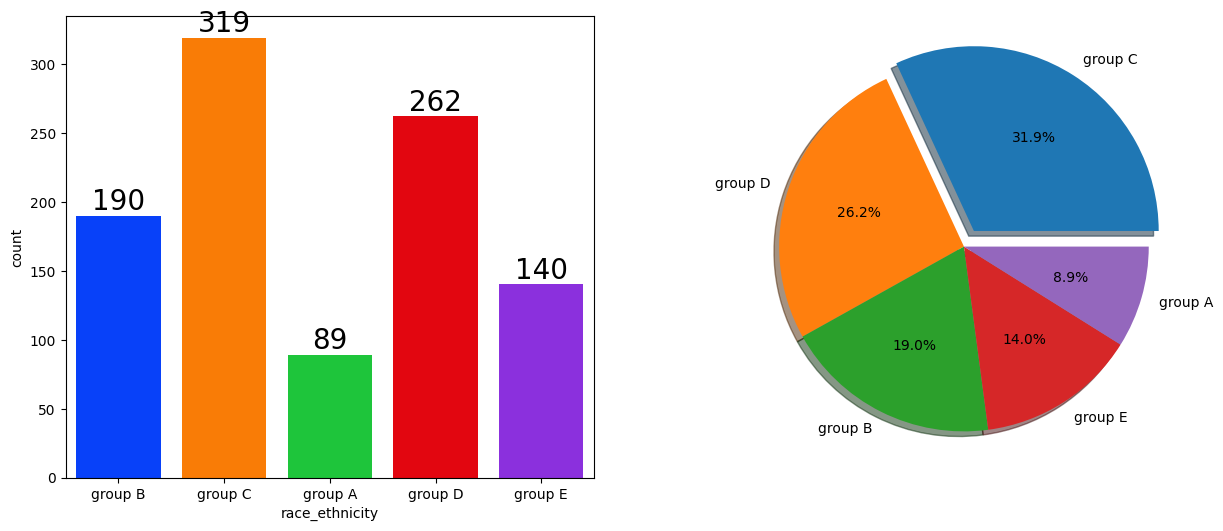

In [ ]:
f,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
# slice thoda bahar nikal ke highlight krega -> explode.
# value_counts() → har group ka count pie chart ke slices banata hai.
# labels=...index → har slice ke label me Group A, B, C, D, E likhe honge.
# shadow=True → pie chart ko 3D look deta hai.
plt.show()  

Insights :-

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.

2.2. BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? ) ->

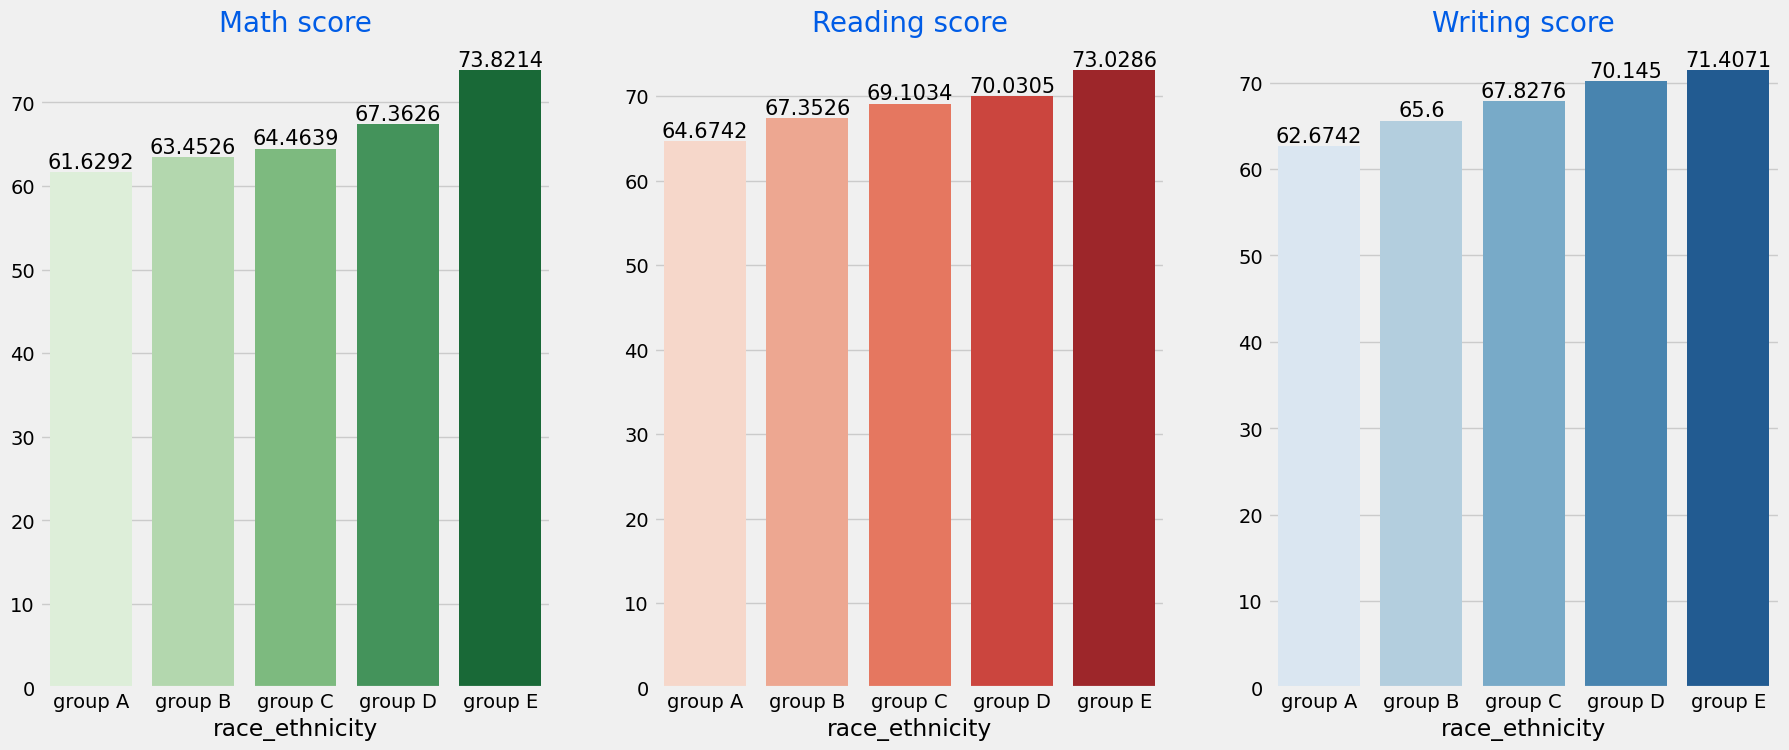

In [98]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'Greens',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'Reds',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'Blues',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights :-

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects.

> 3. PARENTAL LEVEL OF EDUCATION COLUMN

3.1. UNIVARIATE ANALYSIS ( What is educational background of student's parent ? ) ->

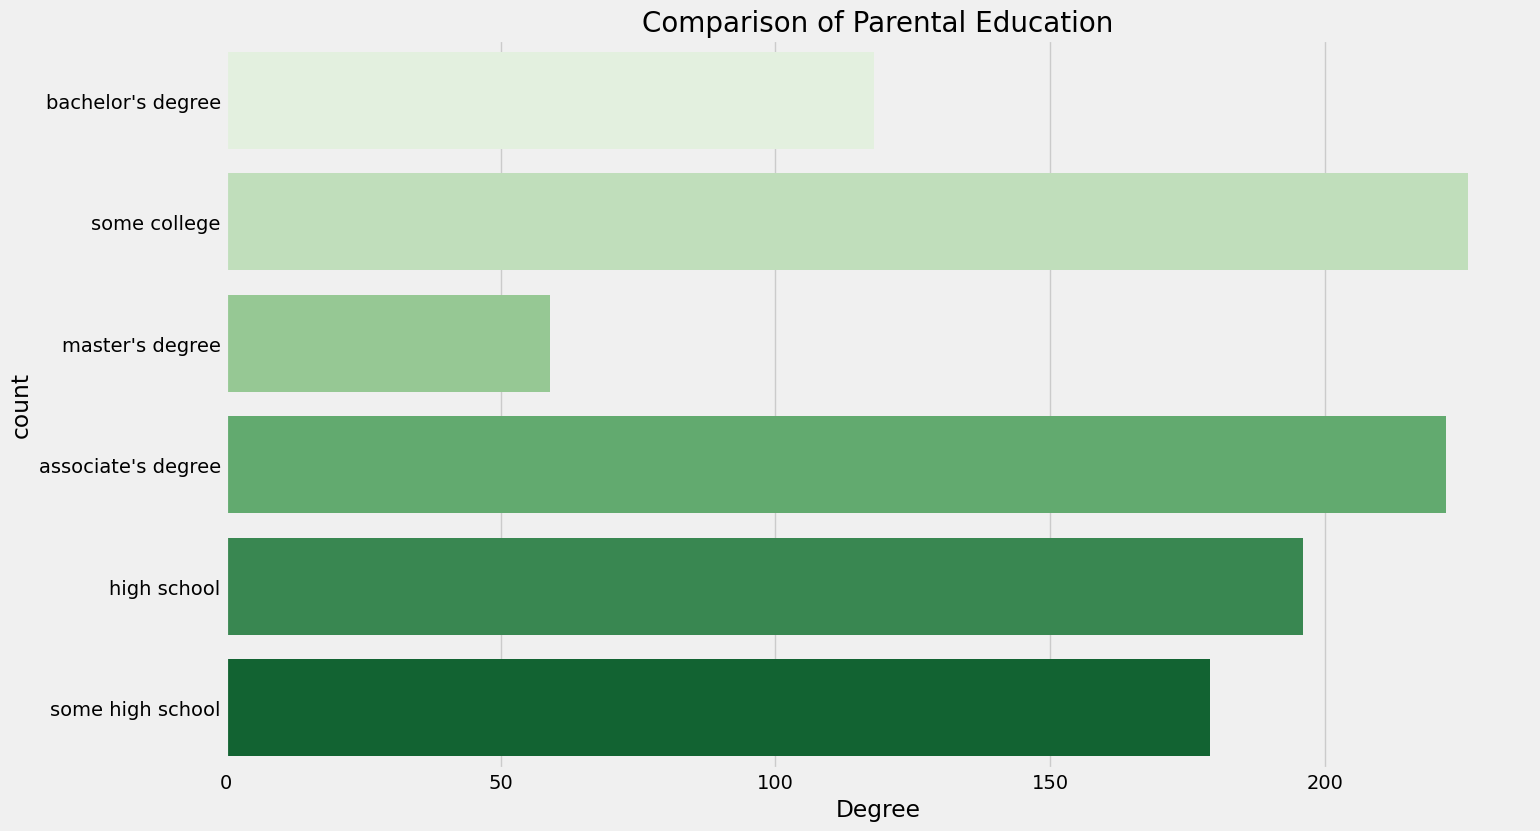

In [99]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Greens')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Insights :-

Largest number of parents are from some college.

3.2. BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? ) ->

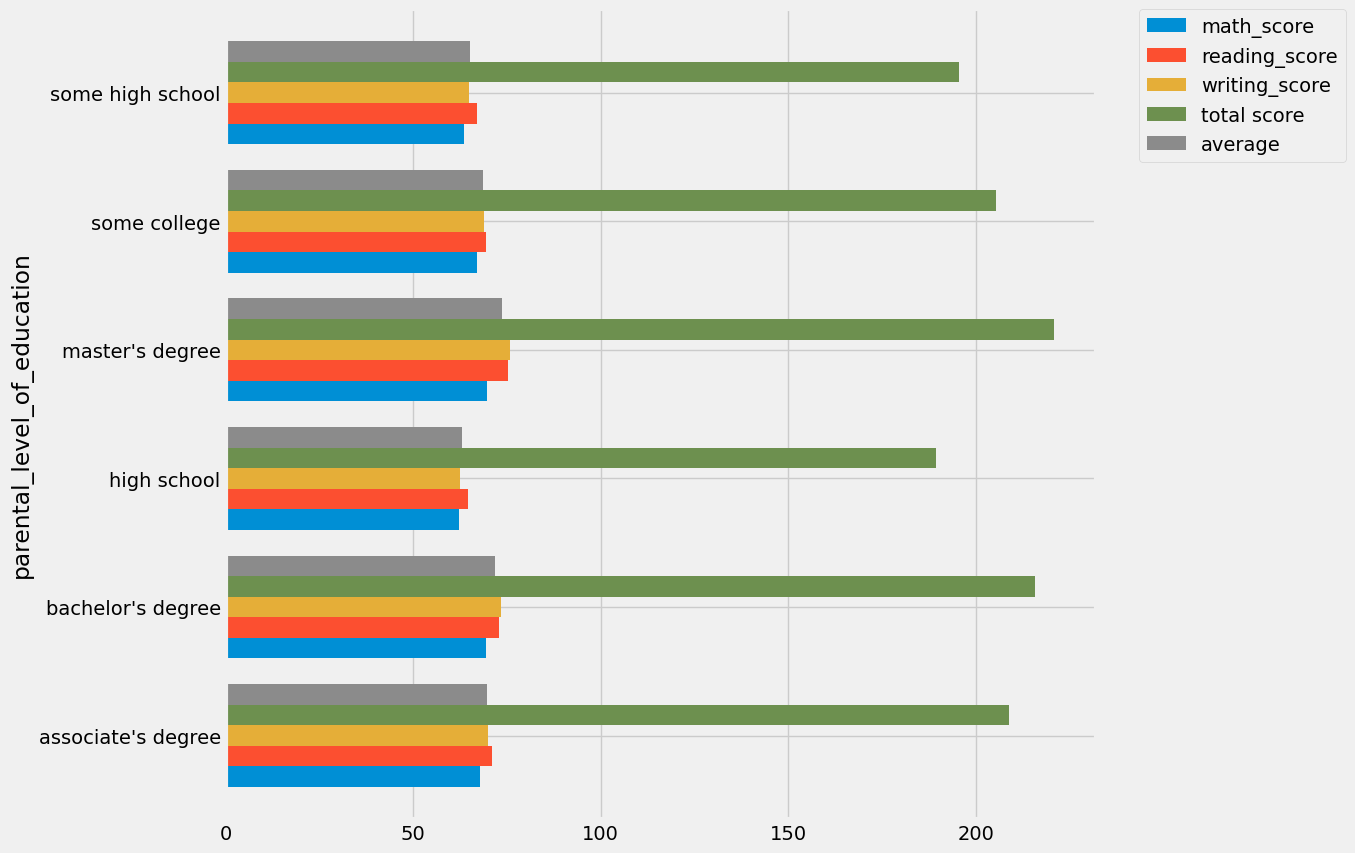

In [102]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df.groupby('parental_level_of_education')[numeric_cols].mean().plot(kind='barh', figsize=(10,10), width=0.8)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights :-

The score of student whose parents possess master and bachelor level education are higher than others.

> 4. LUNCH COLUMN

4.1. UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? ) ->

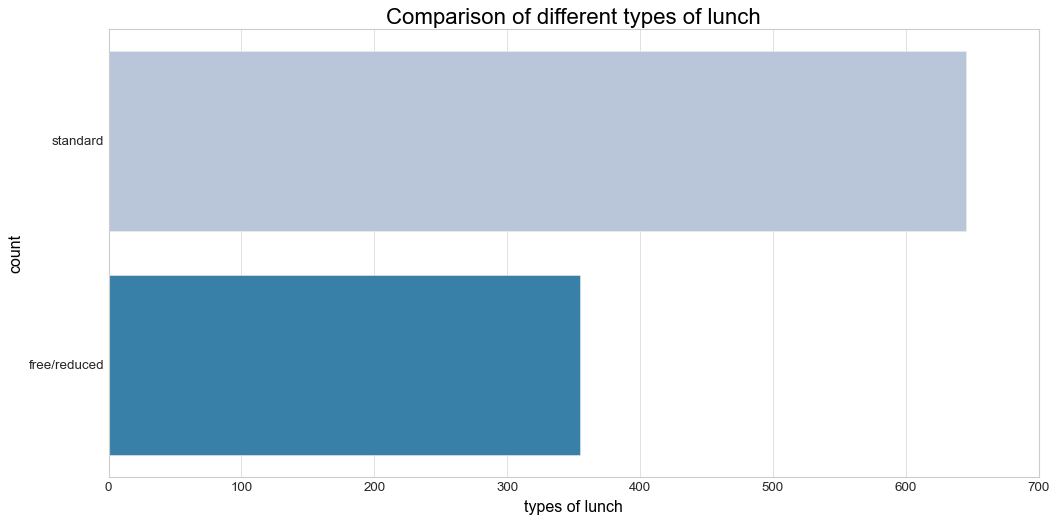

In [120]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-whitegrid')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 20, fontsize = 20, color = 'black')
plt.xlabel('types of lunch',color = 'black')
plt.ylabel('count',color = 'black')
plt.show()

Insights :-

Students being served Standard lunch was more than free lunch.

4.2. BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? ) ->

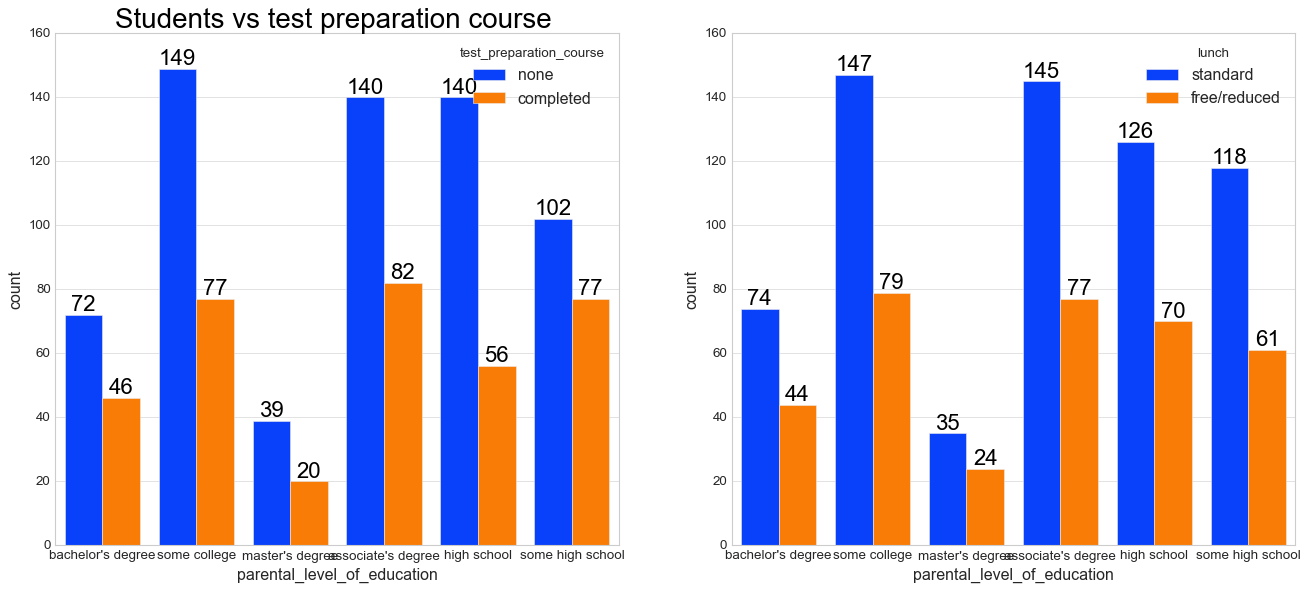

In [121]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',
              saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights :-

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch.

> 5. TEST PREPARATION COURSE COLUMN

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


5.1. BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? ) ->

<Axes: xlabel='lunch', ylabel='writing_score'>

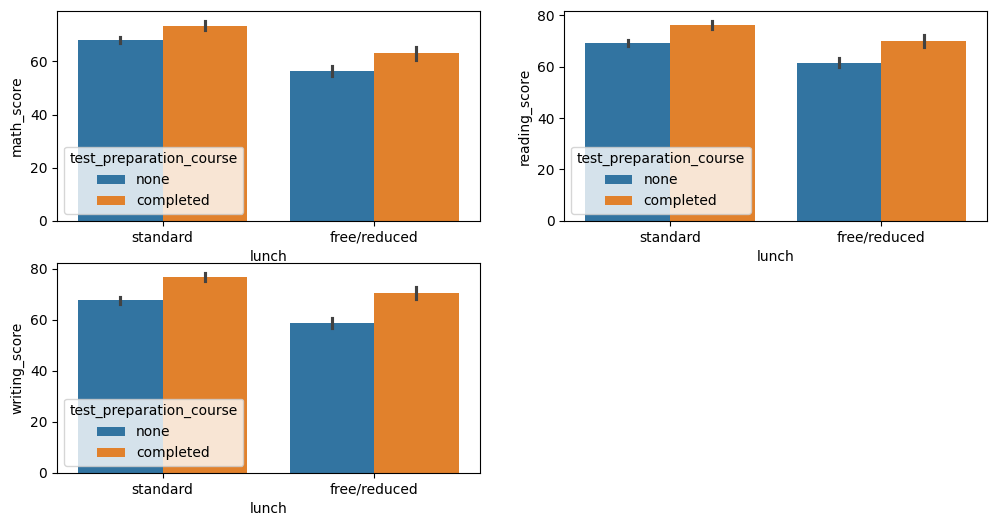

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights :-

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course.

> 6. CHECKING OUTLIERS

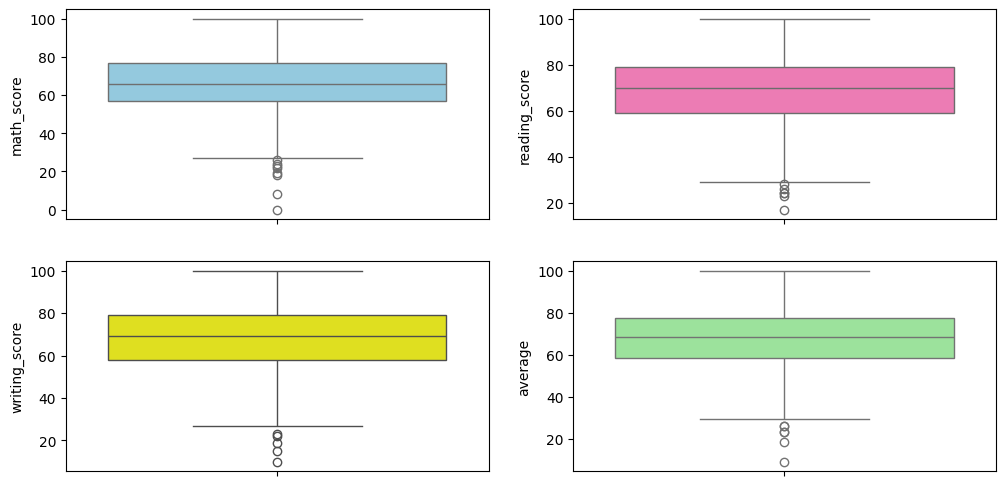

In [16]:
plt.subplots(figsize=(12,6))
plt.subplot(221)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(222)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(223)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(224)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

Insights :-

Most students score between 60 and 85 in all subjects.

Math has highest number of low outliers, suggesting some students struggle more in math.

Outliers affect the overall average, pulling it slightly down.

> 7. MUTIVARIATE ANALYSIS USING PAIRPLOT

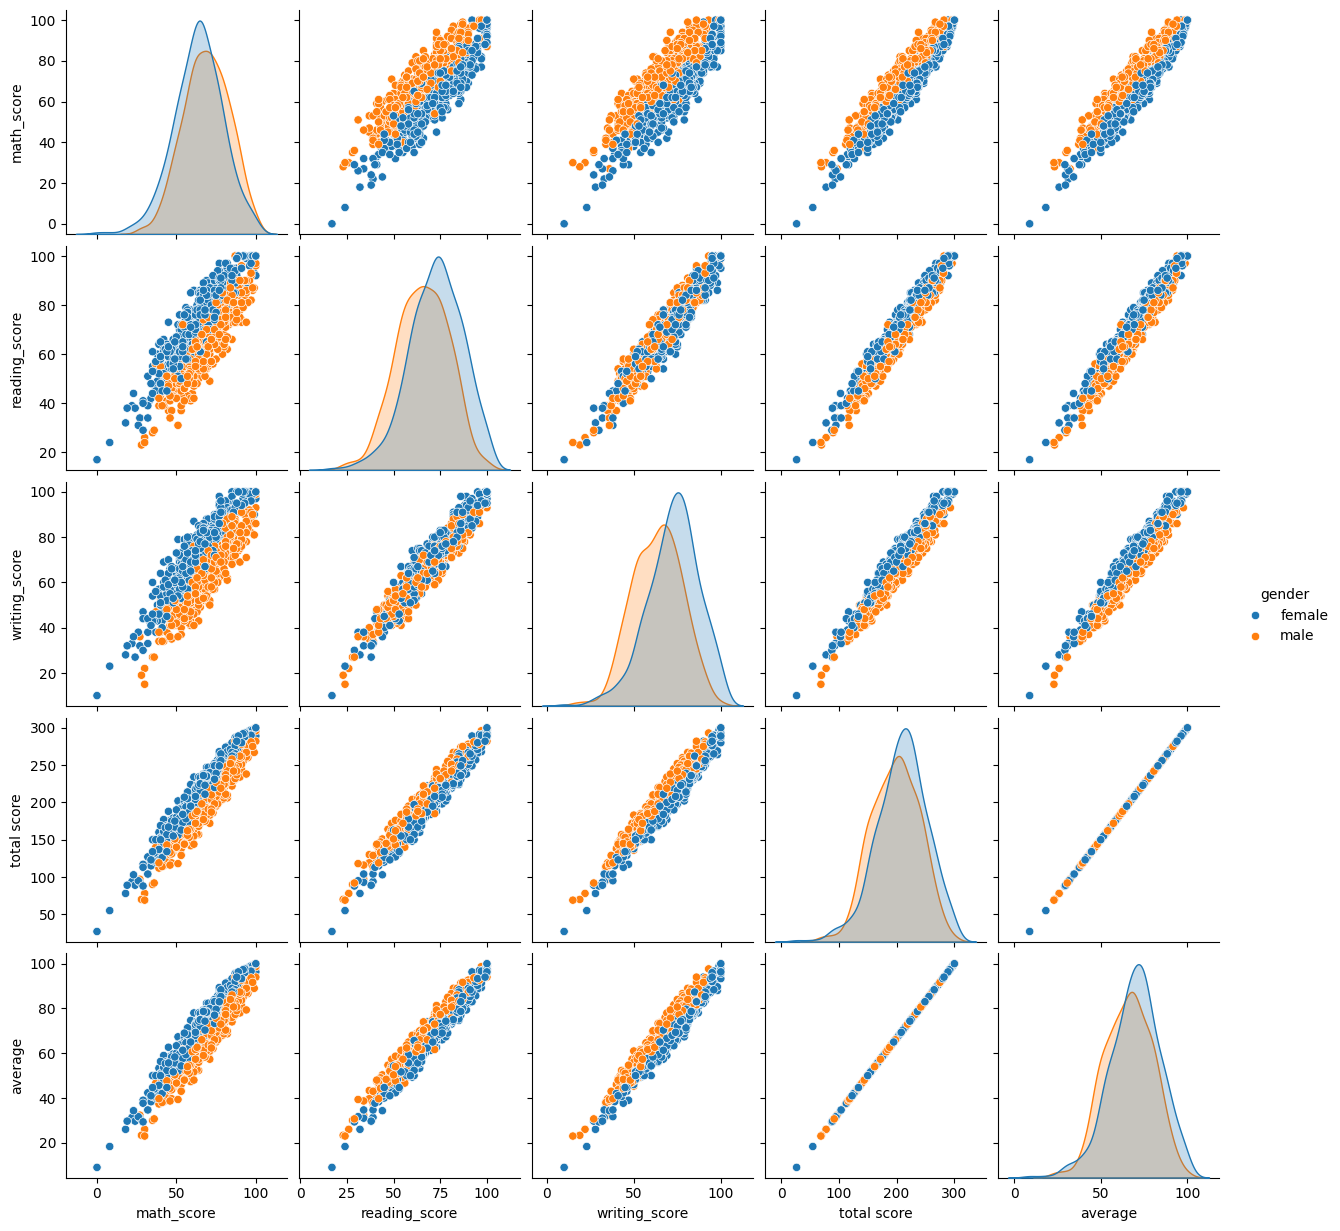

In [17]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights :-

From the above plot it is clear that all the scores increase linearly with each other.

> Conclusions ->

Student's Performance is related with lunch, race, parental level education.

Females lead in pass percentage and also are top-scorers.

Finishing preparation course is benefitial.